# SETUP

In [62]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

%matplotlib inline

# 예측

In [55]:
data_pred_A = pd.read_excel('pred_02.xlsx', sheet_name='A_Site')
data_pred_B = pd.read_excel('pred_02.xlsx', sheet_name='B_Site')
data_pred_C = pd.read_excel('pred_02.xlsx', sheet_name='C_Site')

In [56]:
data_pred_concat = pd.concat([data_pred_A, data_pred_B, data_pred_C], axis=1)
data_pred_concat.shape
data_pred_concat.index = pd.date_range(start='2019-02-19', periods=288, freq='15min')
data_pred_concat.columns = ['A_Site', 'B_Site', 'C_Site']
data_pred_concat.tail()

,A_Site,B_Site,C_Site
2019-02-21 22:45:00,0.0,0.0,0.0
2019-02-21 23:00:00,0.0,0.0,0.0
2019-02-21 23:15:00,0.0,0.0,0.0
2019-02-21 23:30:00,0.0,0.0,0.0
2019-02-21 23:45:00,0.0,0.0,0.0


# 실측

In [31]:
data_act_A = pd.read_excel('act_A_01.xlsx')
data_act_B = pd.read_excel('act_B_01.xlsx')
data_act_C = pd.read_excel('act_C_01.xlsx')

data_act_A.dropna(inplace=True)
data_act_B.dropna(inplace=True)
data_act_C.dropna(inplace=True)

data_act_A_ = data_act_A[['현재 전력(AC)']]
data_act_B_ = data_act_B[['현재 총출력']]
data_act_C_ = data_act_C[['현재출력(AC)']]

In [52]:
data_act_A_.shape, data_act_B_.shape, data_act_C_.shape

((288, 1), (288, 1), (288, 1))

In [54]:
data_act_concat = pd.concat([data_act_A_, data_act_B_, data_act_C_], axis=1)
data_act_concat.columns = ['A_Site', 'B_Site', 'C_Site']
data_act_concat.tail()

,A_Site,B_Site,C_Site
2019-02-21 22:45:00,0,0.0,0.000000
2019-02-21 23:00:00,0,0.0,0.000000
2019-02-21 23:15:00,0,0.0,0.000000
2019-02-21 23:30:00,0,0.0,0.026068
2019-02-21 23:45:00,0,0.0,0.035108


# 비교

In [ ]:
pd.merge()

In [70]:
data_result = pd.DataFrame(columns=['A_Site', 'B_Site', 'C_Site'])
data_result['A_Site'] = data_pred_concat.A_Site - data_act_concat.A_Site
data_result['B_Site'] = data_pred_concat.B_Site - data_act_concat.B_Site
data_result['C_Site'] = data_pred_concat.C_Site - data_act_concat.C_Site

In [67]:
print(r2_score(data_act_concat.A_Site, data_pred_concat.A_Site))
print(r2_score(data_act_concat.B_Site, data_pred_concat.B_Site))
print(r2_score(data_act_concat.C_Site, data_pred_concat.C_Site))

0.9047287198583576
0.8946709547884104
0.8651571960103612


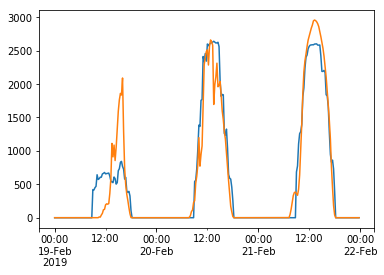

In [59]:
data_pred_concat.A_Site.plot()
data_act_concat.A_Site.plot()

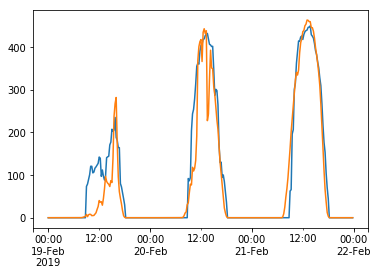

In [60]:
data_pred_concat.B_Site.plot()
data_act_concat.B_Site.plot()

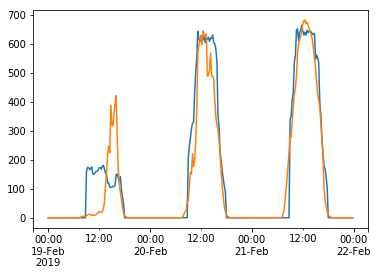

In [61]:
data_pred_concat.C_Site.plot()
data_act_concat.C_Site.plot()